In [377]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import special
from math import factorial
from decimal import *
import sys

In [378]:
def cos_phi_q( N ):

    out = np.zeros( (N,N), dtype='float64' )
    for i in range(N):
        n = i - (N-1)//2
        for j in range(N):
            m = j - (N-1)//2
            if ( n==(m-1) or n==(m+1) ):
                out[i,j]=1/2

    return out

def Hamiltonian_transmon( N , Ej, Ec ):
    
    H=np.zeros( (N,N) , dtype='float64' )
   
    for i in range(N):
        n = i - (N-1)//2
        H[i,i] = 4*Ec*n**2

    H += -Ej*cos_phi_q( N )
        
    return H

## Transmon diagonalisation

In [406]:
#-- quantromon parameters [FROM ELEMENT VALUES]
N=151
ECq = 1
EJq = 50
eta=(1/np.sqrt(2))*(8*ECq/EJq)**0.25
print('eta=', eta)

H=Hamiltonian_transmon( N , EJq, ECq )
e_val, e_vec = np.linalg.eig( H )
sorted_indices = list( np.argsort(e_val) )
e_vec_S = e_vec[:,sorted_indices]
e_val_S = e_val[sorted_indices]
e_val_S= (e_val_S-e_val_S[0])#/(e_val_S[1]-e_val_S[0])

max_lv = 9
print( e_val_S[:9] )

eta= 0.4472135954999579
[  0.          18.94191892  36.73461482  53.2432695   68.06202013
  82.05785084  89.23256626 109.3147679  109.78084471]


(-50.0, 50.0)

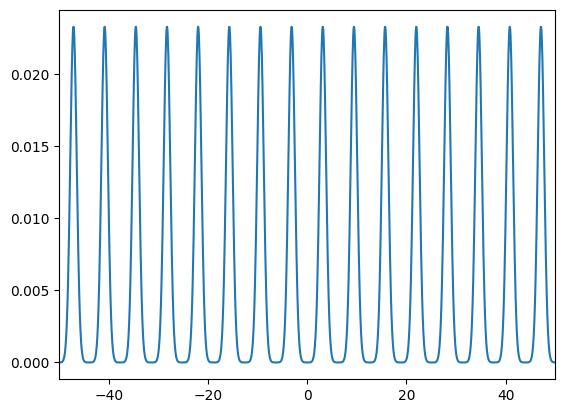

In [409]:
period_nb = 101
#period_nb = 1
N_phi=period_nb*100
phi_offset=np.pi
phi_arr = np.linspace(-np.pi*period_nb,np.pi*period_nb,N_phi)
charge_eigenfunction = np.zeros( (N,N_phi), dtype='complex128' )

for i in range(N):
    n = i - (N-1)//2
    tmp_ef = np.exp( 1j*n*phi_arr )
    norm2 = np.dot( np.conj(tmp_ef), tmp_ef )
    charge_eigenfunction[i,:] = tmp_ef/np.sqrt(norm2)
    
tmp_state = np.zeros( N_phi, dtype='complex128' )
for j in range(period_nb):
    p = j - (period_nb-1)//2
    tmp_state += np.exp( -1.185*( phi_arr-2*np.pi*p-phi_offset )**2 ) 
    
norm2 = np.dot( np.conj(tmp_state), tmp_state )
initial_state = tmp_state/np.sqrt(norm2) 

plt.plot(phi_arr,initial_state)
plt.xlim(-50,50)

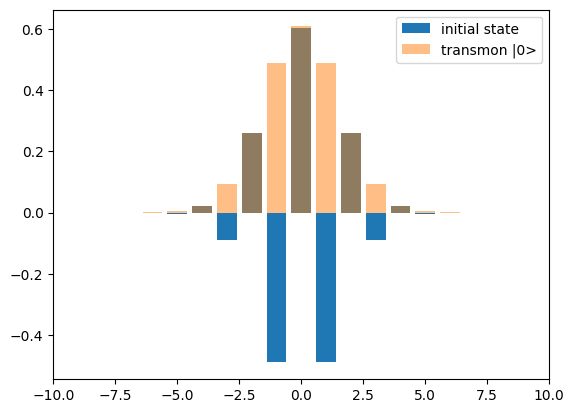

In [410]:
initial_state_CB = np.zeros( N, dtype='complex128' )
for i in range(N):
    initial_state_CB[i] = np.dot( initial_state, charge_eigenfunction[i,:] )
    
plt.bar( n_vals, np.real(initial_state_CB), label='initial state' )
plt.bar( n_vals, e_vec_S[:,0], alpha=0.5, label='transmon |0>' )
plt.xlim(-10,10)
plt.legend()

In [411]:
print( np.dot( np.conj(initial_state_CB), initial_state_CB ) )

(0.9952465807260896+0j)


(-15.0, 15.0)

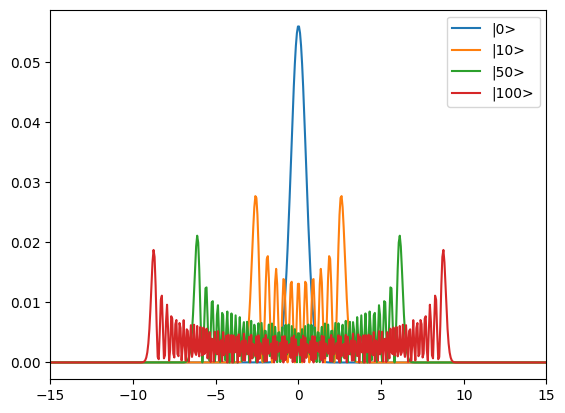

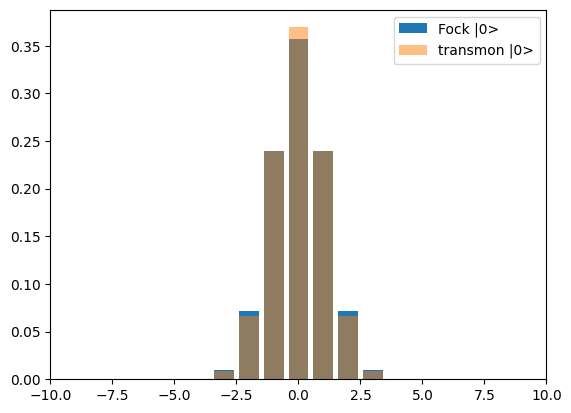

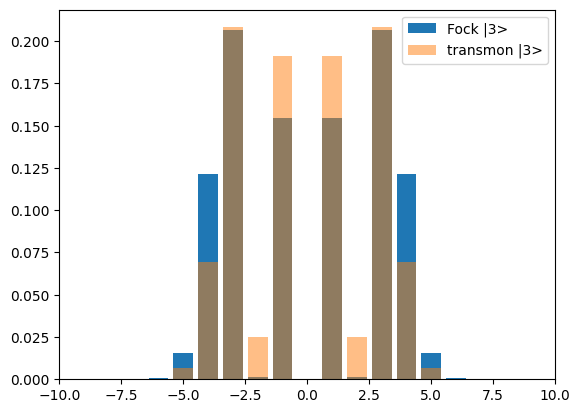

In [385]:
Fock_eigenfunctions_CB = np.zeros( (N_Fock,N), dtype='complex128' )
tmp_function = np.zeros( N, dtype='complex128' )
for n in range(N_Fock):
    for i in range(N):
        tmp_function[i] = np.dot( Fock_eigenfunctions[n,:], charge_eigenfunction[i,:] )
    norm2 = np.dot( tmp_function, tmp_function )
    Fock_eigenfunctions_CB[n,:] = tmp_function/np.sqrt(norm2)
        
plt.bar( n_vals, np.abs(Fock_eigenfunctions_CB[0,:])**2, label='Fock |0>' )
plt.bar( n_vals, e_vec_S[:,0]**2, alpha=0.5, label='transmon |0>' )
plt.xlim(-10,10)
plt.legend()
plt.show()

plt.bar( n_vals, np.abs(Fock_eigenfunctions_CB[3,:])**2, label='Fock |3>' )
plt.bar( n_vals, e_vec_S[:,3]**2, alpha=0.5, label='transmon |3>' )
plt.xlim(-10,10)
plt.legend()

In [386]:
initial_state_FB=np.zeros( N_Fock, dtype='complex128' )
for n in range(N_Fock):
    initial_state_FB[n] = np.dot( initial_state_CB, Fock_eigenfunctions_CB[n,:] )

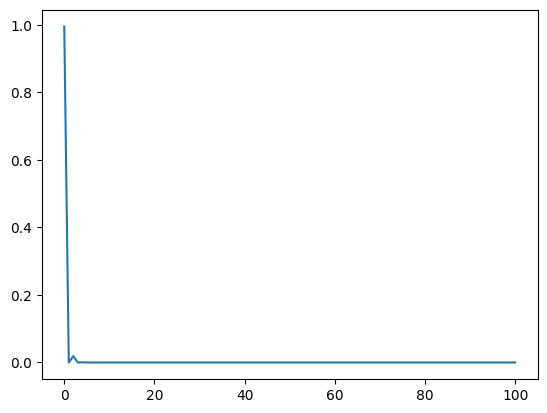

In [387]:
plt.plot(np.arange(N_Fock), initial_state_FB)

In [354]:
def coherent_state(N_Fock_in, alpha_in):
    cs = np.zeros( N_Fock_in, dtype='complex128' )
    for i in range(N_Fock_in):
        temp_D = Decimal( np.exp(np.abs(alpha_in)**2/2) )/Decimal( factorial(i) ).sqrt()
        cs[i] = alpha_in**i*float( temp_D )
    return cs

In [355]:
len(initial_state_FB)

101

In [371]:
nb_periods_H=1
N_phi_H=nb_periods_H*20
N_charge_H=20
phi_arr_H = np.linspace( -np.pi*nb_periods_H/2 , np.pi*nb_periods_H/2 , N_phi_H )
n_arr_H = np.linspace( -2 , 2 , N_charge_H )
husimi=np.zeros( (N_charge_H,N_phi_H), dtype='float64' )

for i in range( len(n_arr_H) ):
    for j in range( len(phi_arr_H) ):
        alpha=phi_arr_H[j] + 1j*n_arr_H[i]
        cs = coherent_state( N_Fock, alpha )
        husimi[i,j] = np.abs( np.dot( initial_state_FB, cs ) )**2    

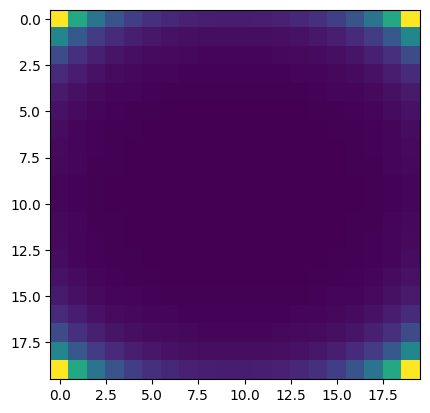

In [372]:
plt.imshow(husimi)